In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Data wrangling

In [2]:
df_house = pd.read_csv('kc_house_data.csv')

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Bedroom and Bathroom

In [7]:
df_house.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

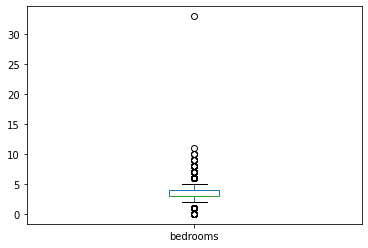

In [8]:
df_house.bedrooms.plot(kind='box')

In [9]:
df_house[df_house.bedrooms == max(df_house.bedrooms)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


This number of bedrooms 33 seems to be a typo and acutally 3 because all other house features including price indicate it is just an average house. This house was sold only once during this period, so there is no additional information. I will change 33 into 3.

In [10]:
print(df_house.bedrooms.iloc[15870])  
df_house.bedrooms = df_house.bedrooms.replace({33:3})
print(df_house.bedrooms.iloc[15870])

33
3


In [11]:
df_house[df_house.bedrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [12]:

df_house.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [13]:
df_house[df_house.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


We can see we have missing values for the columns  bedrooms and  bathrooms 

In [14]:
print("number of NaN values for the column bedrooms :", df_house['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df_house['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace().

In [15]:
mean=df_house['bedrooms'].mean()
df_house['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). 

In [16]:
mean=df_house['bathrooms'].mean()
df_house['bathrooms'].replace(np.nan,mean, inplace=True)

In [17]:
print("number of NaN values for the column bedrooms :", df_house['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df_house['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Remove rows with no bedroom and bathroom

In [19]:
df_house = df_house[(df_house.bedrooms > 0) & (df_house.bathrooms > 0)]
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.671337e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
df_house.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611,
            21612],
           dtype='int64', length=21597)

In [21]:
df_house = df_house.reset_index()
df_house.index

RangeIndex(start=0, stop=21597, step=1)

zipcode             AxesSubplot(0.125,0.125;0.133621x0.755)
lat              AxesSubplot(0.285345,0.125;0.133621x0.755)
long              AxesSubplot(0.44569,0.125;0.133621x0.755)
sqft_living15    AxesSubplot(0.606034,0.125;0.133621x0.755)
sqft_lot15       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

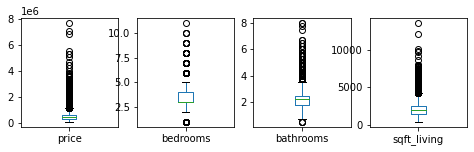

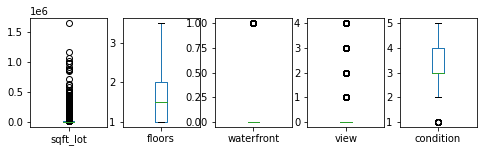

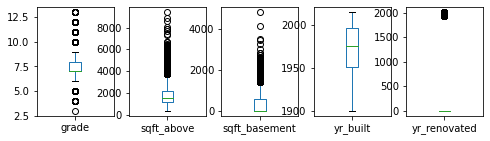

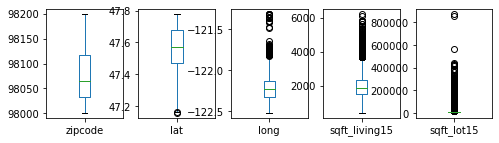

In [22]:
# Check boxplots for outliers
df_house.iloc[:,2:7].plot(kind='box', subplots=True, figsize = (8,2))
df_house.iloc[:,7:12].plot(kind='box', subplots=True, figsize = (8,2))
df_house.iloc[:,12:17].plot(kind='box', subplots=True, figsize = (8,2))
df_house.iloc[:,17:].plot(kind='box', subplots=True, figsize = (8,2))

# ID

In [23]:
df_house.id.nunique()

21420

In [24]:
21613-21436

177

In [25]:
Counter(df_house.id).most_common(5)

[(795000620, 3),
 (6021501535, 2),
 (4139480200, 2),
 (7520000520, 2),
 (3969300030, 2)]

In [26]:
# Check house 795000620 which was sold 3 times
df_house[df_house.id==795000620]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17589,17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17590,17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


In [27]:
# make sales_order
sales_count=defaultdict(int)
sales_order =[] # sale order for each hourse
for house_id in df_house.id:
    sales_count[house_id] +=1
    sales_order.append(sales_count[house_id])

In [28]:
Counter(sales_order)

Counter({1: 21420, 2: 176, 3: 1})

In [29]:
# Add sales_order column
df_house['sales_order'] = sales_order

In [30]:
df_house.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


# Price

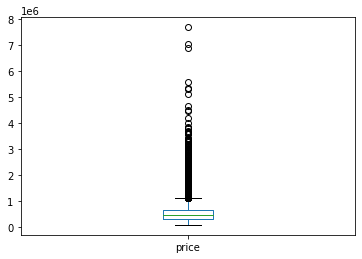

In [31]:
df_house.price.plot(kind='box')

In [32]:
df_house.price.describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [33]:
df_house[df_house.price == max(df_house.price)]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
7245,7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1


In [34]:

df_house[df_house.price == min(df_house.price)]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
15279,15293,40000362,20140506T000000,78000.0,2,1.0,780,16344,1.0,0,...,780,0,1942,0,98168,47.4739,-122.28,1700,10387,1


# sqft_living

In [35]:
df_house.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

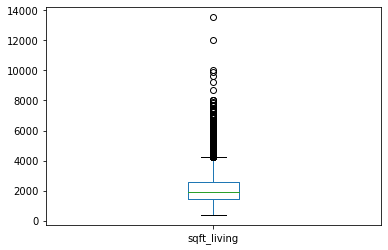

In [36]:
df_house.sqft_living.plot(kind='box')

In [37]:
df_house[df_house.sqft_living==max(df_house.sqft_living)]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
12764,12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,1


In [38]:

df_house[df_house.sqft_living==min(df_house.sqft_living)]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
15367,15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,...,370,0,1923,0,98117,47.6778,-122.389,1340,5000,1


# sqft_lot

In [39]:
df_house.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

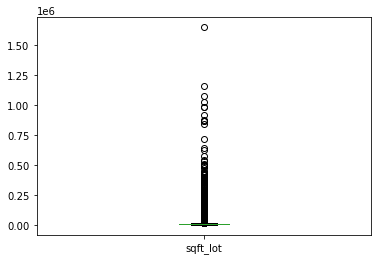

In [40]:
df_house.sqft_lot.plot(kind='box')

In [41]:
df_house[df_house.sqft_lot==max(df_house.sqft_lot)]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_order
1717,1719,1020069017,20150327T000000,700000.0,4,1.0,1300,1651359,1.0,0,...,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,1


# yr_renovated

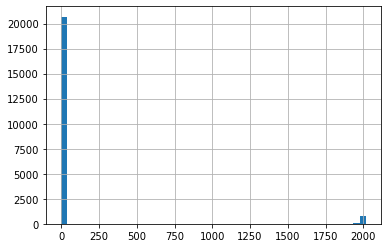

In [42]:
df_house.yr_renovated.hist(bins=50)
plt.show()

In [43]:
# number of missing years
sum(df_house.yr_renovated == 0)

20683

In [44]:
# number of not missing years
sum(df_house.yr_renovated > 0)

914

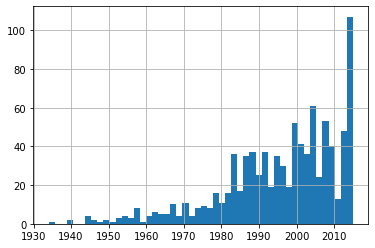

In [45]:
df_house.yr_renovated[df_house.yr_renovated > 0].hist(bins=50)
plt.show()

In [46]:
df_house.yr_renovated = np.maximum(df_house.yr_built, df_house.yr_renovated)

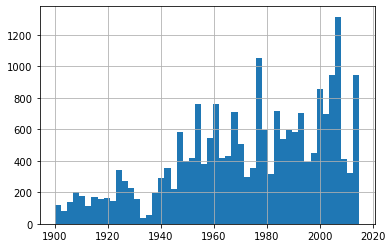

In [47]:
df_house.yr_renovated.hist(bins=50)
plt.show()

I filled the missing values of yr_renovate with yr_built

In [48]:
# Save DataFrames to csv files
df_house.to_csv('df_house.csv')